<a href="https://colab.research.google.com/github/BazaiHassan/cfd/blob/main/CFD_Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

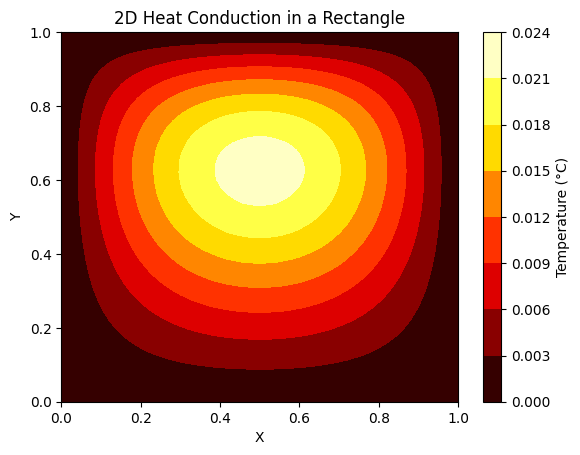

Converged in 693 iterations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
alpha = 0.01  # Thermal diffusivity (material-dependent)
Lx = 1.0     # Length of the rectangle in the x-direction
Ly = 1.0     # Length of the rectangle in the y-direction
Nx = 50      # Number of grid points in the x-direction
Ny = 50      # Number of grid points in the y-direction
dx = Lx / Nx # Grid spacing in the x-direction
dy = Ly / Ny # Grid spacing in the y-direction
tolerance = 1e-4

# Initialize temperature field
T = np.zeros((Nx+1, Ny+1))  # Temperature field (including boundaries)
T_new = np.copy(T)          # New temperature field for the iterative solver

# Boundary conditions
T_top = 100.0  # Temperature at the top boundary
T_bottom = 0.0 # Temperature at the bottom boundary
T_left = 0.0   # Temperature at the left boundary
T_right = 0.0  # Temperature at the right boundary

# Set boundary conditions
T[:, 0] = T_bottom
T[:, -1] = T_top
T[0, :] = T_left
T[-1, :] = T_right

# Iterative solver (Gauss-Seidel method)
iteration = 0
max_iterations = 10000
while iteration < max_iterations:
    for i in range(1, Nx):
        for j in range(1, Ny):
            T_new[i, j] = 0.25 * (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1])

    # Check for convergence
    if np.max(np.abs(T_new - T)) < tolerance:
        break

    # Update the temperature field
    T[:] = T_new
    iteration += 1

# Plot the temperature field
X, Y = np.meshgrid(np.linspace(0, Lx, Nx+1), np.linspace(0, Ly, Ny+1))
plt.contourf(X, Y, T.T, cmap='hot')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Heat Conduction in a Rectangle')
plt.show()

print(f"Converged in {iteration} iterations")



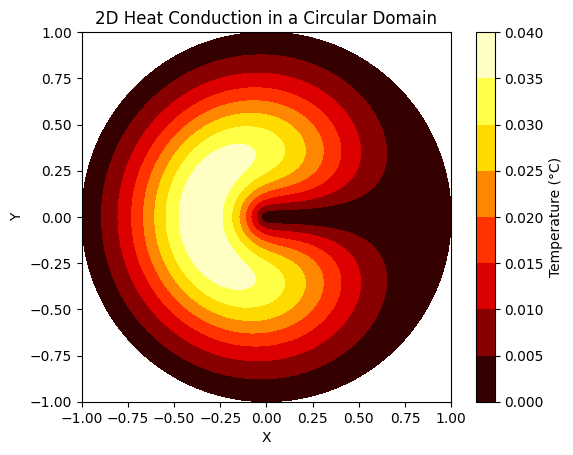

Converged in 613 iterations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
alpha = 0.01  # Thermal diffusivity (material-dependent)
R = 1.0       # Radius of the circular domain
Nr = 50       # Number of radial grid points
Ntheta = 100  # Number of angular grid points
dr = R / Nr   # Radial grid spacing
dtheta = 2 * np.pi / Ntheta # Angular grid spacing
tolerance = 1e-4

# Initialize temperature field
T = np.zeros((Nr+1, Ntheta+1))  # Temperature field (including boundaries)
T_new = np.copy(T)              # New temperature field for the iterative solver

# Boundary conditions
T_outer = 0.0  # Temperature at the outer boundary (circle edge)

# Set boundary conditions (inner boundary at r=0 is assumed to be constant)
T[0, :] = 100.0  # Temperature at the center of the circle
T[Nr, :] = T_outer  # Temperature at the outer boundary

# Iterative solver (Gauss-Seidel method)
iteration = 0
max_iterations = 10000
while iteration < max_iterations:
    for i in range(1, Nr):
        for j in range(1, Ntheta):
            T_new[i, j] = (T[i+1, j] + T[i-1, j] + T[i, j+1] + T[i, j-1]) / 4.0

    # Check for convergence
    if np.max(np.abs(T_new - T)) < tolerance:
        break

    # Update the temperature field
    T[:] = T_new
    iteration += 1

# Convert polar coordinates to Cartesian coordinates for plotting
r = np.linspace(0, R, Nr+1)
theta = np.linspace(0, 2*np.pi, Ntheta+1)
R, Theta = np.meshgrid(r, theta)
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Plot the temperature field
plt.contourf(X, Y, T.T, cmap='hot')
plt.colorbar(label='Temperature (°C)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Heat Conduction in a Circular Domain')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

print(f"Converged in {iteration} iterations")
